# Create Ansatz

In [1]:
from qamomile.core.ansatz.predefined.efficient_su2 import create_efficient_su2
from qamomile.core.ansatz.custom_ansatz import CustomAnsatz
import qamomile.core.layer as qm_l
from qamomile.core.circuit.drawer import plot_quantum_circuit

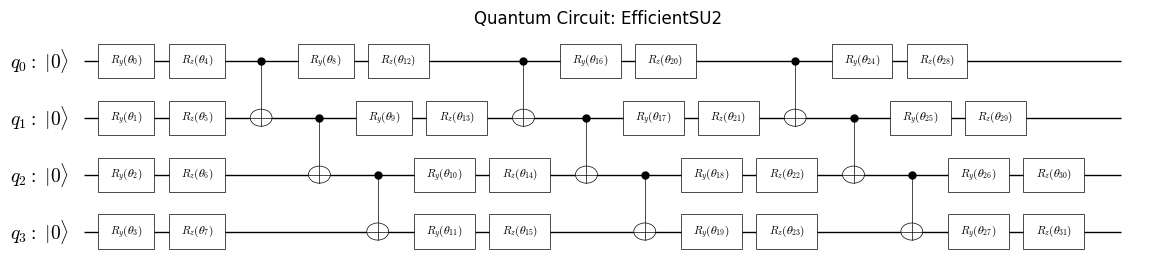

In [2]:
su2_circ = create_efficient_su2(4, rotation_types=["ry", "rz"], reps = 3).get_circuit()
plot_quantum_circuit(su2_circ, decompose_level=1)

# Create Custom Ansatz

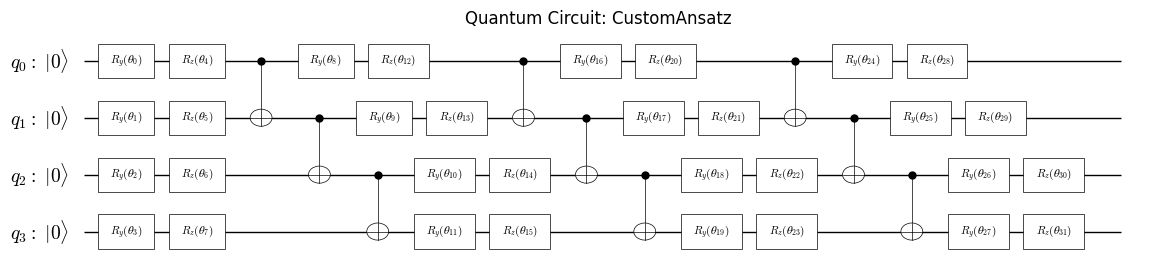

In [3]:
num_qubits = 4
layers = [
    qm_l.RotationLayer(num_qubits, rotation_type="ry"),
    qm_l.RotationLayer(num_qubits, rotation_type="rz"),
    qm_l.EntanglementLayer(num_qubits,entangle_type="linear"),
]
custom_ansatz = CustomAnsatz(num_qubits, layers, reps=3)
handmade_su2 = custom_ansatz.get_circuit()

# Add final rotation layer by hand
handmade_su2.append(qm_l.RotationLayer(num_qubits, rotation_type="ry", parameter_context=custom_ansatz.parameter_context).get_circuit())
handmade_su2.append(qm_l.RotationLayer(num_qubits, rotation_type="rz", parameter_context=custom_ansatz.parameter_context).get_circuit())

plot_quantum_circuit(handmade_su2, decompose_level=1)

In [4]:
import qamomile.core.operator as qm_o

H = qm_o.Z(0) * qm_o.Z(1) + qm_o.Z(1)

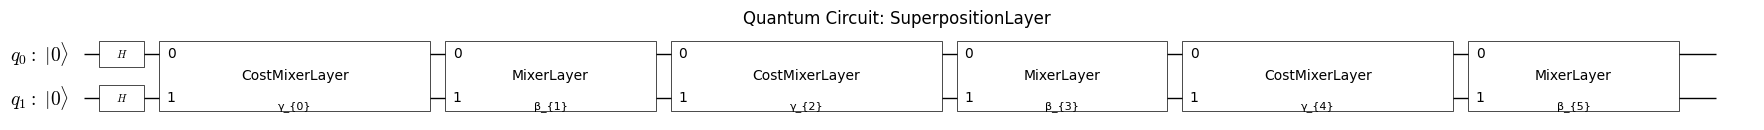

In [5]:

layers = [
    qm_l.CostLayer(H),
    qm_l.MixerLayer(H.num_qubits, mixer_type="x"),
]
custom_ansatz = CustomAnsatz(H.num_qubits, layers, reps=3)
handmade_qaoa = qm_l.SuperpositionLayer(H.num_qubits).get_circuit()
handmade_qaoa.append( custom_ansatz.get_circuit())
plot_quantum_circuit(handmade_qaoa, decompose_level=2)


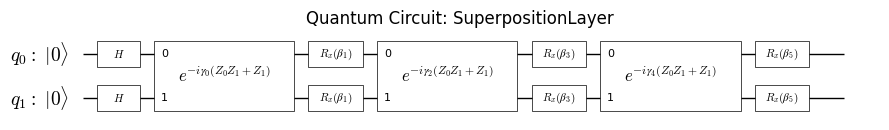

In [6]:
plot_quantum_circuit(handmade_qaoa, decompose_level=2)